In [1]:
%matplotlib inline
import numpy as np
import math
import random
import pyJHTDB
import matplotlib.pyplot as plt
import time as tt

N = 3
T = pyJHTDB.dbinfo.channel5200['time'][-1]
time = np.random.random()*T

spatialInterp  = 6  # 6 point Lagrange
temporalInterp = 0  # no time interpolation
FD4Lag4        = 44 # 4 point Lagrange interp for derivatives

# mhdc has starttime .364 and endtime .376
startTime = time
endTime = startTime + 0.012
lag_dt = 0.0004

# Select points in the database to query
lpoints = []
for i in range(0,N):
    lpoints.append([random.uniform(0, 8*3.14),random.uniform(-1, 1),random.uniform(0, 3*3.14)])

# 2D array with single precision values
points = np.array(lpoints,dtype='float32')

In [2]:
# load shared library
lTDB = pyJHTDB.libJHTDB()
#initialize webservices
lTDB.initialize()

#Add token
auth_token  = "edu.jhu.pha.turbulence.testing-201311"  #Replace with your own token here
lTDB.add_token(auth_token)

print('Coordinates of {0} points where variables are requested:'.format(N))
for p in range(N):
    print('{0}: {1}'.format(p, points[p]))
print('Data is requested at time {0}'.format(time))

Coordinates of 3 points where variables are requested:
0: [ 6.3283534  -0.17958385  5.452727  ]
1: [ 9.09647    -0.60446095  8.458514  ]
2: [10.521149   0.2950432  5.78516  ]
Data is requested at time 3.0803307052793087


In [3]:
print('Requesting velocity at {0} points...'.format(N))
result = lTDB.getData(time, points,data_set = 'channel',
        sinterp = spatialInterp, tinterp = temporalInterp,
        getFunction = 'getVelocity')
for p in range(N):
    print('{0}: {1}'.format(p, result[p]))

Requesting velocity at 3 points...
0: [ 1.1210539  -0.03419957  0.00162858]
1: [ 1.1426262  -0.05935254 -0.00571733]
2: [ 1.1049949  -0.02450197  0.00622782]


In [4]:
print('Requesting pressure at {0} points...'.format(N))
result = lTDB.getData(time, points,data_set = 'channel',
        sinterp = spatialInterp, tinterp = temporalInterp,
        getFunction = 'getPressure')
for p in range(N):
    print('{0}: {1}'.format(p, result[p]))

Requesting pressure at 3 points...
0: [-0.00300605]
1: [-0.00024776]
2: [-0.00020522]


In [5]:
print('Requesting velocity and pressure at {0} points...'.format(N))
result = lTDB.getData(time, points,data_set = 'channel',
        sinterp = spatialInterp, tinterp = temporalInterp,
        getFunction = 'getVelocityAndPressure')
for p in range(N):
    print('{0}: {1}'.format(p, result[p]))

Requesting velocity and pressure at 3 points...
0: [ 1.1210539  -0.03419957  0.00162858 -0.00300605]
1: [ 1.1426262e+00 -5.9352536e-02 -5.7173264e-03 -2.4775669e-04]
2: [ 1.1049949e+00 -2.4501974e-02  6.2278197e-03 -2.0522415e-04]


In [6]:
print('Requesting velocity gradient at {0} points...'.format(N))
result = lTDB.getData(time, points,
        sinterp = FD4Lag4, tinterp = temporalInterp,data_set ='channel',
        getFunction = 'getVelocityGradient')
for p in range(N):
    print('{0}: '.format(p) +
          'duxdx = {0:+e}, duxdy = {1:+e}, duxdz = {2:+e}\n   '.format(result[p][0], result[p][1], result[p][2]) +
          'duydx = {0:+e}, duydy = {1:+e}, duydz = {2:+e}\n   '.format(result[p][3], result[p][4], result[p][5]) +
          'duzdx = {0:+e}, duzdy = {1:+e}, duzdz = {2:+e}'.format(result[p][6], result[p][7], result[p][8]))

Requesting velocity gradient at 3 points...
0: duxdx = +5.938676e-01, duxdy = +1.928057e-01, duxdz = +1.744217e-01
   duydx = +1.231981e-01, duydy = -5.141016e-01, duydz = -1.997479e-01
   duzdx = +4.254496e-01, duzdy = +4.301313e-02, duzdz = -8.424819e-02
1: duxdx = +4.756251e-01, duxdy = +3.821765e-01, duxdz = -6.315711e-01
   duydx = -1.526319e-01, duydy = +6.589985e-01, duydz = +1.944525e-01
   duzdx = -7.299306e-01, duzdy = +1.249166e+00, duzdz = -1.121721e+00
2: duxdx = +2.898371e-01, duxdy = +4.309473e-01, duxdz = +1.242195e-01
   duydx = +4.658284e-01, duydy = +1.676269e-01, duydz = +2.679969e-01
   duzdx = +1.811157e-01, duzdy = +4.584728e-01, duzdz = -4.608038e-01


In [7]:
print('Requesting velocity hessian at {0} points...'.format(N))
result = lTDB.getData(time, points,data_set = 'channel',sinterp = FD4Lag4, tinterp = temporalInterp,
                      getFunction = 'getVelocityHessian')

for p in range(N):
        print('{0}: '.format(p) +
              'd2uxdxdx = {0:+e}, d2uxdxdy = {1:+e}, d2uxdxdz = {2:+e}\n   '.format(result[p][ 0], result[p][ 1], result[p][ 2])
            + 'd2uxdydy = {0:+e}, d2uxdydz = {1:+e}, d2uxdzdz = {2:+e}\n   '.format(result[p][ 3], result[p][ 4], result[p][ 5])
            + 'd2uydxdx = {0:+e}, d2uydxdy = {1:+e}, d2uydxdz = {2:+e}\n   '.format(result[p][ 6], result[p][ 7], result[p][ 8])
            + 'd2uydydy = {0:+e}, d2uydydz = {1:+e}, d2uydzdz = {2:+e}\n   '.format(result[p][ 9], result[p][10], result[p][11])
            + 'd2uzdxdx = {0:+e}, d2uzdxdy = {1:+e}, d2uzdxdz = {2:+e}\n   '.format(result[p][12], result[p][13], result[p][14])
            + 'd2uzdydy = {0:+e}, d2uzdydz = {1:+e}, d2uzdzdz = {2:+e}'.format(result[p][15], result[p][16], result[p][17]))
        

Requesting velocity hessian at 3 points...
0: d2uxdxdx = -1.971851e+00, d2uxdxdy = -4.998473e+00, d2uxdxdz = -8.058794e+00
   d2uxdydy = +2.155235e+01, d2uxdydz = -1.124114e+01, d2uxdzdz = -4.539442e+00
   d2uydxdx = +4.678142e-01, d2uydxdy = +4.511125e+00, d2uydxdz = +4.990036e+00
   d2uydydy = +3.249477e-01, d2uydydz = +5.338207e+00, d2uydzdz = +3.742833e+01
   d2uzdxdx = -1.744710e-01, d2uzdxdy = -1.061594e+01, d2uzdxdz = -2.108485e+00
   d2uzdydy = +3.554662e+01, d2uzdydz = +4.585231e+00, d2uzdzdz = +2.571704e+00
1: d2uxdxdx = +2.359956e+01, d2uxdxdy = -1.931318e+00, d2uxdxdz = -7.503563e+00
   d2uxdydy = -6.933257e+00, d2uxdydz = +3.866373e+01, d2uxdzdz = -8.380189e+01
   d2uydxdx = -3.751386e+00, d2uydxdy = +2.441366e+01, d2uydxdz = -2.278907e+01
   d2uydydy = -2.810012e+01, d2uydydz = +3.550199e+01, d2uydzdz = -2.346208e+01
   d2uzdxdx = -2.596212e+00, d2uzdxdy = -6.114422e+00, d2uzdxdz = -4.638736e+01
   d2uzdydy = +6.140784e+00, d2uzdydz = +2.988090e+01, d2uzdzdz = -3.214938e+

In [8]:
print('Requesting velocity laplacian at {0} points...'.format(N))
result = lTDB.getData(time, points,
        sinterp = FD4Lag4, tinterp = temporalInterp, data_set = 'channel',
        getFunction = 'getVelocityLaplacian')
for p in range(N):
    print('{0}: '.format(p) +
          'grad2ux = {0:+e}, grad2uy = {1:+e}, grad2uz = {2:+e}, '.format(result[p][0], result[p][1], result[p][2]))

Requesting velocity laplacian at 3 points...
0: grad2ux = +1.504106e+01, grad2uy = +3.822109e+01, grad2uz = +3.794386e+01, 
1: grad2ux = -6.713558e+01, grad2uy = -5.531358e+01, grad2uz = -2.860481e+01, 
2: grad2ux = +2.277726e+01, grad2uy = +1.657537e+01, grad2uz = -2.268590e+01, 


In [9]:
print('Requesting pressure gradient at {0} points...'.format(N))
result = lTDB.getData(time, points,
        sinterp = FD4Lag4, tinterp = temporalInterp, data_set = 'channel',
        getFunction = 'getPressureGradient')
for p in range(N):
    print('{0}: '.format(p)
        + 'dpdx = {0:+e}, dpdy = {1:+e}, dpdz = {2:+e}, '.format(result[p][0], result[p][1], result[p][2]))

Requesting pressure gradient at 3 points...
0: dpdx = +1.014020e-02, dpdy = -1.156699e-02, dpdz = -6.419769e-03, 
1: dpdx = +8.686610e-03, dpdy = +1.219288e-02, dpdz = +2.896368e-02, 
2: dpdx = -2.755649e-02, dpdy = -1.746573e-02, dpdz = +1.495600e-03, 


In [10]:
print('Requesting pressure hessian at {0} points...'.format(N))
result = lTDB.getData(time, points,
        sinterp = FD4Lag4, tinterp = temporalInterp, data_set = 'channel',
        getFunction = 'getPressureHessian')
for p in range(N):
    print('{0}: '.format(p) +
          'd2pdxdx = {0:+e}, d2pdxdy = {1:+e}, d2pdxdz = {2:+e}\n   '.format(result[p][0], result[p][1], result[p][2])
        + 'd2pdydy = {0:+e}, d2pdydz = {1:+e}, d2pdzdz = {2:+e}'.format(result[p][3], result[p][4], result[p][5]))

Requesting pressure hessian at 3 points...
0: d2pdxdx = -6.564052e-01, d2pdxdy = +5.553191e-01, d2pdxdz = +5.524373e-02
   d2pdydy = -1.032309e-01, d2pdydz = +3.458472e-01, d2pdzdz = -5.548740e-02
1: d2pdxdx = -8.439599e-01, d2pdxdy = +7.556130e-01, d2pdxdz = -1.326737e+00
   d2pdydy = -9.738283e-01, d2pdydz = +1.717922e+00, d2pdzdz = -1.517767e+00
2: d2pdxdx = -6.804482e-02, d2pdxdy = -8.703430e-01, d2pdxdz = +1.915629e-01
   d2pdydy = -8.965667e-01, d2pdydz = +8.786923e-01, d2pdzdz = -5.516260e-02


In [11]:
print('Requesting pressure hessian at {0} points...'.format(N))
result = lTDB.getData(time, points,
        sinterp = FD4Lag4, tinterp = temporalInterp, data_set = 'channel',
        getFunction = 'getInvariant')
for p in range(N):
    print('{0}: '.format(p) +
          'S2 = {0:+e}, O2 = {1:+e}'.format(result[p][0], result[p][1]))

Requesting pressure hessian at 3 points...
0: S2 = +8.662117e-01, O2 = +6.339655e-02
1: S2 = -4.014076e-01, O2 = +3.913964e+00
2: S2 = +7.040581e-01, O2 = -1.604953e+00


In [12]:
result = lTDB.getThreshold(
            data_set = 'channel',
            field = 'vorticity',
            time = 0,
            threshold = 65,
            x_start = 1, y_start = 1, z_start = 1,
            x_end = 4, y_end = 4, z_end = 4,
            sinterp = 40,
            tinterp = 0)
for p in range(result.shape[0]):
    print('{0}: '.format(p)
        + 'i_x = {0}, i_y = {1}, i_z = {2}, value = {3} '.format(result[p][0], result[p][1], result[p][2],result[p][3]))

0: i_x = 4, i_y = 4, i_z = 2, value = 65.96614837646484 
1: i_x = 4, i_y = 3, i_z = 2, value = 65.83401489257812 
2: i_x = 4, i_y = 2, i_z = 2, value = 65.75108337402344 
3: i_x = 4, i_y = 1, i_z = 2, value = 65.71419525146484 


In [13]:
start = tt.time()
result = lTDB.getCutout(
    data_set = 'channel',
    field='u',
    time_step=int(1),
    start = np.array([1, 1, 1], dtype = np.int),
    end  = np.array([512, 512, 1], dtype = np.int),
    step  = np.array([1, 1, 1], dtype = np.int),
    filter_width = 1)
#print(result)
end = tt.time()
print(end - start)

1.4249804019927979


(1, 512, 512, 3)


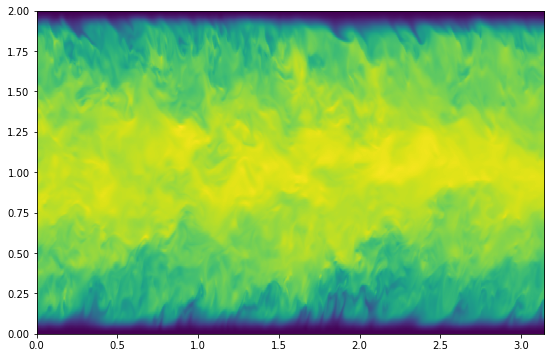

In [14]:
print(result.shape)
fig = plt.figure(figsize = (20, 40))
a = fig.add_subplot(121)
#a.set_axis_off()
a.imshow(result[0,:,:,0],
         extent = [0, 3.14, 0, 2],
         interpolation = 'none')

In [15]:
x, t = lTDB.getPosition(
    starttime = 0.1,
    endtime = 0.2,
    dt = 0.01,
    data_set = 'channel',
    point_coords = points[0:1,:],
    steps_to_keep = 10)
print(x)

starting integration loop, dataset is  channel
at time step 1 out of 10
got next position for time step 1
at time step 2 out of 10
got next position for time step 2
at time step 3 out of 10
got next position for time step 3
at time step 4 out of 10
got next position for time step 4
at time step 5 out of 10
got next position for time step 5
at time step 6 out of 10
got next position for time step 6
at time step 7 out of 10
got next position for time step 7
at time step 8 out of 10
got next position for time step 8
at time step 9 out of 10
got next position for time step 9
at time step 10 out of 10
got next position for time step 10
[[[ 6.3283534  -0.17958385  5.452727  ]]

 [[ 6.339611   -0.17961593  5.4524546 ]]

 [[ 6.3508687  -0.17964602  5.452183  ]]

 [[ 6.3621264  -0.17967425  5.451912  ]]

 [[ 6.3733845  -0.17970048  5.451642  ]]

 [[ 6.384642   -0.17972486  5.451373  ]]

 [[ 6.3959     -0.1797472   5.451105  ]]

 [[ 6.4071574  -0.17976767  5.4508386 ]]

 [[ 6.4184146  -0.1797861

In [16]:
t1 = np.linspace(0, 4*3.14, 256)
t2 = np.linspace(-1, 1, 256)
x = np.zeros((t1.shape[0], t2.shape[0], 3), np.float32)
x[:, :, 0] = t1[np.newaxis, :]
x[:, :, 1] = t2[:, np.newaxis]
x[:, :, 2] = .0

In [17]:
T = pyJHTDB.dbinfo.channel5200['time'][-1]
time = np.random.random()*T
u = lTDB.getData(
               time,
               x,
               data_set = 'channel5200',
               sinterp = 4,
               getFunction='getVelocity')

(256, 256, 3)


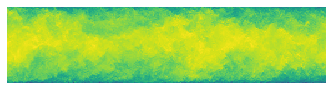

In [18]:
print(u.shape)
fig = plt.figure(figsize = (t1[-1] - t1[0], t2[-1] - t2[0]))
a = fig.add_subplot(121)
a.set_axis_off()
a.imshow(u[:,:,0],
         extent = [t1[0], t1[-1] - t1[0], t2[0], t2[-1] - t2[0]],
         interpolation = 'none')

In [19]:
lTDB.finalize()